In [1]:
import os
import glob
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import seaborn as sns

In [2]:
nltk.download('all', 'c:/Users/Jan/Desktop/Just_Breathe_Video/PROJECT_PROCESS_MINING/nltk')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to c:/Users/Jan/Desktop/Just_
[nltk_data]    |     Breathe_Video/PROJECT_PROCESS_MINING/nltk...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to c:/Users/Jan/Desktop/Ju
[nltk_data]    |     st_Breathe_Video/PROJECT_PROCESS_MINING/nltk...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to c:/
[nltk_data]    |     Users/Jan/Desktop/Just_Breathe_Video/PROJECT_PROC
[nltk_data]    |     ESS_MINING/nltk...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     c:/Users/Jan/Desktop/Just_Breathe_Video/PROJECT_P
[nltk_data]    |     ROCESS_MINING/nltk...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |

True

[nltk_data] Downloading package punkt to c:/Users/Jan/Desktop/Just_Bre
[nltk_data]     athe_Video/PROJECT_PROCESS_MINING/nltk...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to c:/Users/Jan/Desktop/Just
[nltk_data]     _Breathe_Video/PROJECT_PROCESS_MINING/nltk...
[nltk_data]   Package stopwords is already up-to-date!


NLTK data paths: ['C:\\Users\\Jan/nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\share\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\nltk_data', 'C:\\Users\\Jan\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'c:/Users/Jan/Desktop/Just_Breathe_Video/PROJECT_PROCESS_MINING/nltk']
 So, we don't even do heavy training. There are many people who have not enough caffeine. This is the issue that coffee is not enough for them to drink. And that's really true. So, avoid it.
['So', ',', 'we', 'do', "n't", 'even', 'do', 'heavy', 'training', '.', 'There', 'are', 'many', 'people', 'who', 'have', 'not', 'enough', 'caffeine', '.', 'This', 'is', 'the', 'issue', 'that', 'coffee', 'is', 'not', 'enough', 'for', 'them', 

C:\Users\Jan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


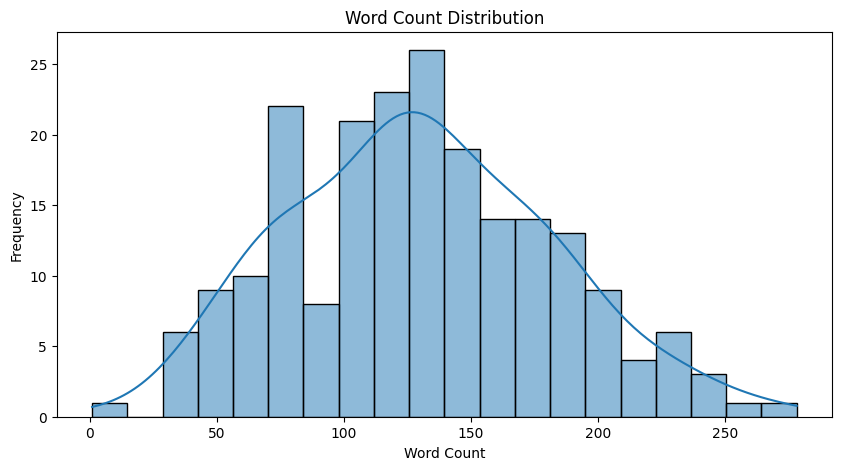

C:\Users\Jan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


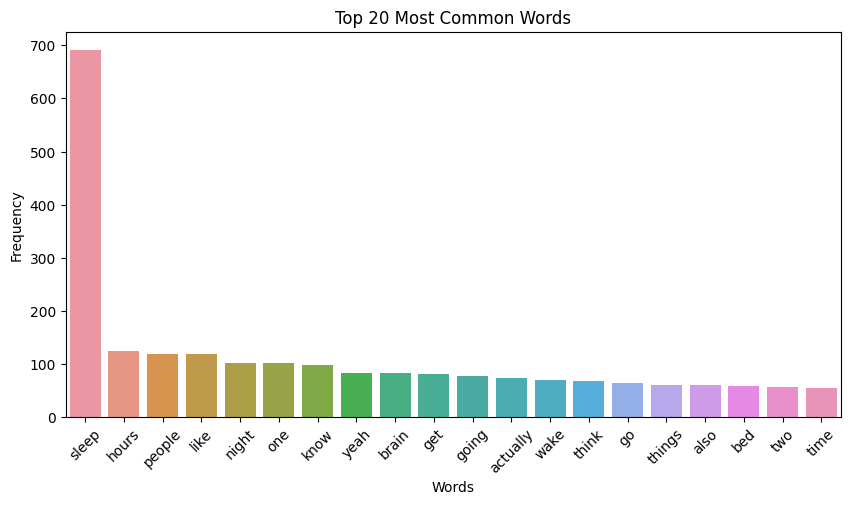

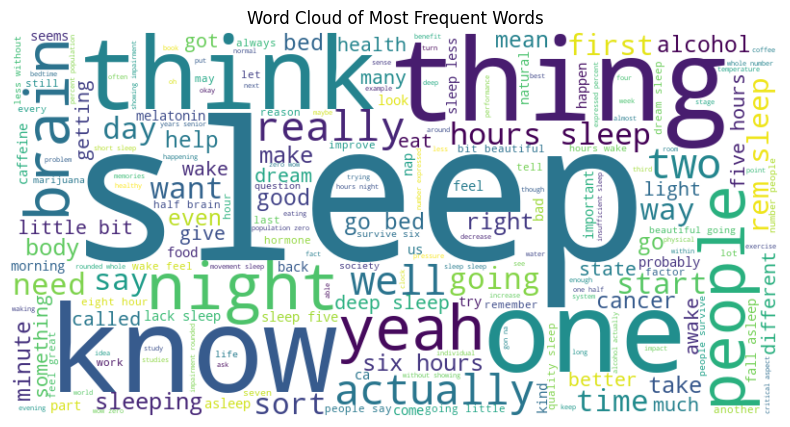

C:\Users\Jan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


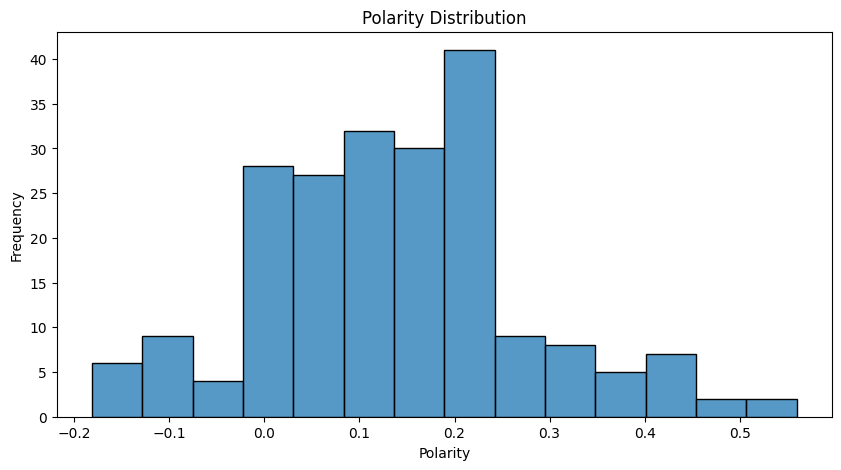

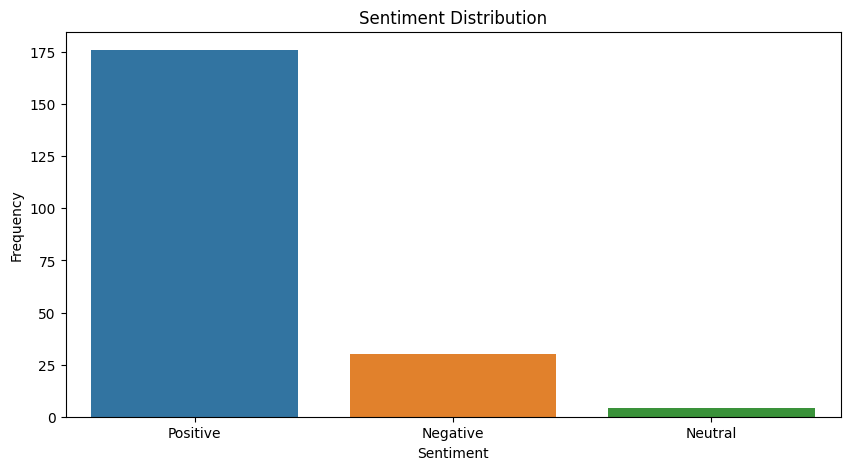


Top Words per Topic:
Topic #1:
['wow', 'say', 'half', 'brain', 'going', 'zero', 'yeah', 'number', 'hours', 'people']
Topic #2:
['like', 'years', 'know', 'minutes', 'people', 'critical', 'actually', 'brain', 'hours', 'night']
Topic #3:
['gon', 'day', 'bed', 'times', 'time', 'night', 'hour', 'hours', 'rats', 'cancer']
Topic #4:
['actually', 'day', 'time', 'people', 'wake', 'going', 'think', 'know', 'night', 'like']
Topic #5:
['sort', 'really', 'things', 'rem', 'yeah', 'know', 'actually', 'hours', 'alcohol', 'people']


In [3]:
path = 'c:/Users/Jan/Desktop/Just_Breathe_Video/PROJECT_PROCESS_MINING/nltk'
nltk.data.path.append(path)
nltk.download('punkt', download_dir=path)
nltk.download('stopwords', download_dir=path)

# Set the path to the folder containing transcripts
TRANSCRIPTS_FOLDER = 'transcripts_bad'

print("NLTK data paths:", nltk.data.path)

# Load all text files into a DataFrame
def load_transcripts(folder_path):
    transcripts = []
    for file_path in glob.glob(os.path.join(folder_path, '*.txt')):
        with open(file_path, 'r', encoding='utf-8') as file:
            transcripts.append({'file_name': os.path.basename(file_path), 'content': file.read()})
    return pd.DataFrame(transcripts)

# Load data
data = load_transcripts(TRANSCRIPTS_FOLDER)

# Add a word count column
print(data['content'].iloc[0])
print(word_tokenize(data['content'].iloc[0], language="english"))
data['word_count'] = data['content'].apply(lambda x: len(word_tokenize(x)))

# Print basic statistics
print("Dataset Summary:")
print(f"Total Transcripts: {len(data)}")
print(f"Average Word Count: {data['word_count'].mean():.2f}")
print("Word Count Distribution:")
print(data['word_count'].describe())

# Visualize word count distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['word_count'], kde=True, bins=20)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Text Preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stopwords and non-alphanumeric
    return ' '.join(tokens)

data['cleaned_content'] = data['content'].apply(preprocess_text)

# Most Common Words
all_words = ' '.join(data['cleaned_content']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Visualize common words
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

# Sentiment Analysis
data['polarity'] = data['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['sentiment'] = data['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

plt.figure(figsize=(10, 5))
sns.histplot(data, x = 'polarity')#, order=['Positive', 'Neutral', 'Negative'])
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Sentiment Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data, x = 'sentiment')#, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Topic Modeling with LDA
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['cleaned_content'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display Topics
print("\nTop Words per Topic:")
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# Save processed data
# data.to_csv('processed_transcripts.csv', index=False)



Top 20 Bigrams:
hours sleep: 45
sleep hours: 38
rem sleep: 34
deep sleep: 26
little bit: 25
sleep night: 22
lack sleep: 20
night sleep: 19
fall asleep: 16
going little: 16
half brain: 16
dream sleep: 15
sleep know: 15
survive hours: 15
hours night: 15
bit beautiful: 15
people say: 14
wake feel: 14
feel great: 14
quality sleep: 14


C:\Users\Jan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


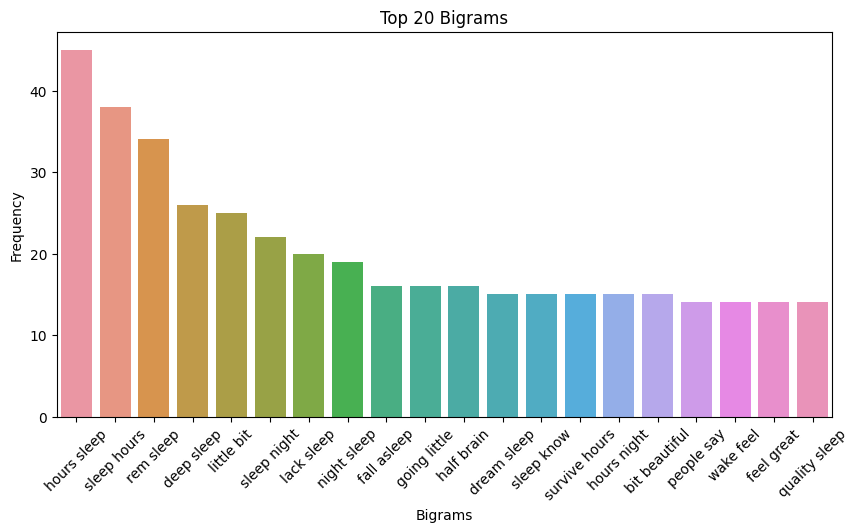


Top 20 Trigrams:
going little bit: 16
survive hours sleep: 15
little bit beautiful: 15
bit beautiful going: 14
beautiful going little: 14
people say sleep: 13
sleep hours wake: 13
hours wake feel: 13
wake feel great: 13
number people survive: 13
people survive hours: 13
hours sleep showing: 13
sleep showing impairment: 13
showing impairment rounded: 13
impairment rounded number: 13
rounded number expressed: 13
number expressed percent: 13
expressed percent population: 13
percent population zero: 13
population zero wow: 12


C:\Users\Jan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


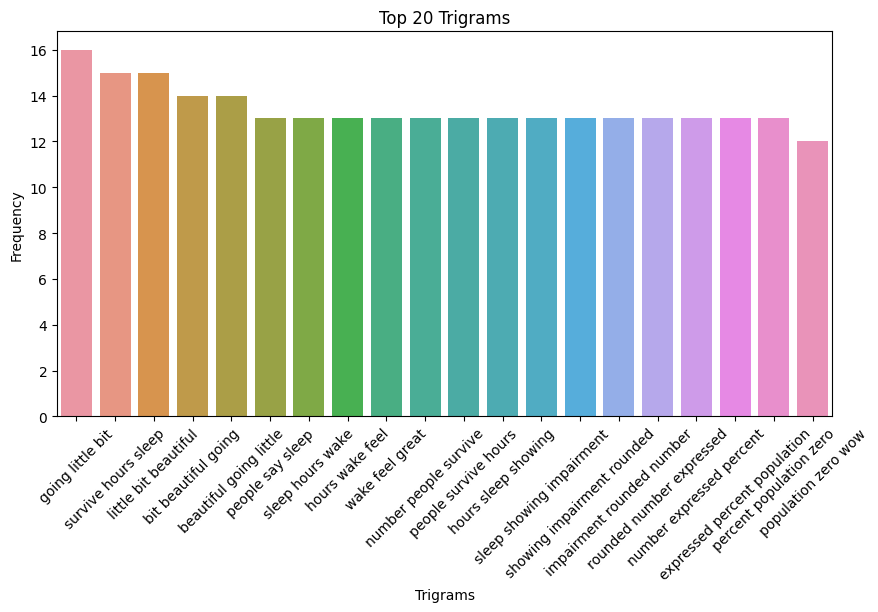

In [4]:
# Function to generate n-grams from cleaned text
from sklearn.feature_extraction.text import CountVectorizer

def generate_ngrams(texts, ngram_range=(2, 2), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngram_matrix = vectorizer.fit_transform(texts)
    ngram_freq = ngram_matrix.sum(axis=0)  # Sum up frequencies of each n-gram
    ngram_counts = [(ngram, ngram_freq[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    ngram_counts = sorted(ngram_counts, key=lambda x: x[1], reverse=True)[:top_n]
    return ngram_counts

# Generate and display bigrams
print("\nTop 20 Bigrams:")
bigrams = generate_ngrams(data['cleaned_content'], ngram_range=(2, 2))
for bigram, count in bigrams:
    print(f"{bigram}: {count}")

# Visualize bigrams
plt.figure(figsize=(10, 5))
sns.barplot(x=[bigram[0] for bigram in bigrams], y=[bigram[1] for bigram in bigrams])
plt.title('Top 20 Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate and display trigrams
print("\nTop 20 Trigrams:")
trigrams = generate_ngrams(data['cleaned_content'], ngram_range=(3, 3))
for trigram, count in trigrams:
    print(f"{trigram}: {count}")

# Visualize trigrams
plt.figure(figsize=(10, 5))
sns.barplot(x=[trigram[0] for trigram in trigrams], y=[trigram[1] for trigram in trigrams])
plt.title('Top 20 Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
